# MBA em Ciência de Dados
### Universidade de São Paulo, São Carlos, Brasil

**Disciplina:** Aprendizado de Máquina

**Professor Reponsavel:** Prof. Dr. André Carlos Ponce de Leon Ferreira de Carvalho
📧 andre@icmc.usp.br
🌐 [linkedin](https://www.linkedin.com/in/andr%C3%A9-carlos-ponce-de-leon-f-de-carvalho-151bb26/)
🔗 [site](http://www.cemeai.icmc.usp.br/component/teamdisplay/108)

# Prática: Usando Algoritmos de Ensemble em um Problema de Regressão

**Autor:** Edesio Alcobaça
📧 edesio@usp.br
🌐 [linkedin](https://www.linkedin.com/in/ealcobaca/)
🔗 [site](https://ealcobaca.github.io/)

## Descrição & Objetivo

**Descrição dos Dados:** Consumidores fanáticos por abacate decidiram criar uma planilha com o preço médio anual em diversas regiões durante os anos de 2015 a 2018. Os seguintes campos foram anotados:

* **AveragePrice** - preço médio de um abacate
* **type** - tipo do abacate: conventional or organic
* **year** - ano
* **Region** - cidade ou região onde a observação foi feita
* **Total Volume** - Número médio de abacates vendidos diariamente
* **4046** - Número médio diário de abacates vendidos com PLU 4046
* **4225** - Número médio diário de abacates vendidos com PLU 4225
* **4770** - Número médio diário de abacates vendidos com PLU 4770

Para entender mais sobre o PLU veja esse [site](https://californiaavocado.com/retail/avocado-plus/).

**Objetivo:** Modelar o problema com Ensembles de forma a prever o preço médio de um abacate.

## 1. Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


## 2. Leitura dos Dados

In [ ]:
# Leitura de dados
data = pd.read_csv("avocado_grouped_data.csv")

target = 'AveragePrice'

categorical_features = ["region", "type"]

numerical_features = ["year", "Total Volume", "4046", "4225", "4770"]

data

,year,type,region,AveragePrice,Total Volume,4046,4225,4770
0,2015,conventional,Albany,1.171923,7.620873e+04,1037.874615,61764.253654,668.795000
1,2015,conventional,Atlanta,1.052308,4.403464e+05,347741.840385,35386.637308,757.858077
2,2015,conventional,BaltimoreWashington,1.168077,7.681415e+05,56546.030769,487421.365385,45104.819423
3,2015,conventional,Boise,1.054038,7.088575e+04,45940.442500,10164.187115,5309.087692
4,2015,conventional,Boston,1.144038,5.237806e+05,4685.945192,409901.282692,1607.198846
...,...,...,...,...,...,...,...,...
427,2018,organic,Syracuse,1.242500,5.688144e+03,143.621667,101.041667,0.000000
428,2018,organic,Tampa,1.452500,8.415949e+03,125.270833,610.078333,0.000000
429,2018,organic,TotalUS,1.554167,1.510488e+06,137640.345000,360420.295000,1407.105833
430,2018,organic,West,1.613333,2.549791e+05,28676.619167,53221.085833,191.065833


## 2. Análise Exploratória de Dados

In [ ]:
# Número de exemplos e features
data.shape

(432, 8)

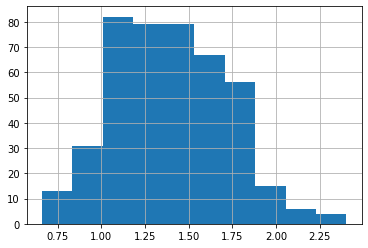

In [ ]:
# target distribution
data[target].hist()

In [ ]:
# estatisticas da target
data[target].describe()

count    432.000000
mean       1.394253
std        0.320811
min        0.659808
25%        1.145817
50%        1.385064
75%        1.630096
max        2.403208
Name: AveragePrice, dtype: float64

In [ ]:
# Verificar se tem NaN
data.isna().sum()

year            0
type            0
region          0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
dtype: int64

In [ ]:
# Descrever dados categóricos
data.describe(include=[object])

,type,region
count,432,432
unique,2,54
top,conventional,Albany
freq,216,8


In [ ]:
# Descrever dados numéricos
data.describe(include=[np.number])


,year,AveragePrice,Total Volume,4046,4225,4770
count,432.00000,432.000000,4.320000e+02,4.320000e+02,4.320000e+02,4.320000e+02
mean,2016.50000,1.394253,8.920706e+05,3.049745e+05,2.989822e+05,2.188050e+04
std,1.11933,0.320811,3.582444e+06,1.295333e+06,1.194733e+06,9.576609e+04
min,2015.00000,0.659808,1.289274e+03,2.679057e+00,6.390962e+00,0.000000e+00
25%,2015.75000,1.145817,1.230606e+04,8.947879e+02,3.480897e+03,9.158173e-01
50%,2016.50000,1.385064,1.180031e+05,1.063797e+04,3.042860e+04,3.231658e+02
75%,2017.25000,1.630096,4.774981e+05,1.167135e+05,1.612054e+05,7.488512e+03
max,2018.00000,2.403208,4.212553e+07,1.467107e+07,1.243870e+07,1.153793e+06


# 3. Modelagem & Avaliação com Ensembles

## 3.1 Baseline

In [ ]:
# Separar os dados em treinamento e teste

X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("cat", OrdinalEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# zscore para mudar escala os dados
scaler = StandardScaler()

# modelo baseline
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# pipeline de machine learning
pipeb = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', lr)
])

# cross validação da solução
cv_list_lr_baseline = cross_val_score(
    pipeb,
    X_train,
    y_train,
    cv=10,
    scoring="r2"
)

In [ ]:
mean_cv_lr_baseline = np.mean(cv_list_lr_baseline)
std_cv_lr_baseline = np.std(cv_list_lr_baseline)

print(f"Performance (r2): {round(mean_cv_lr_baseline, 4)} +- {round(std_cv_lr_baseline, 4)}")

Performance (r2): 0.5537 +- 0.1066


![image](https://www.researchgate.net/profile/Ryan-Byrne-2/publication/334404567/figure/fig4/AS:862185249071106@1582572390782/Illustrations-of-A-bagging-and-B-boosting-ensemble-algorithms.ppm)

# 3.2 Modelando com Random Forest e Gradient Boosting



In [ ]:

# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# modelo RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators = 100,
    criterion="squared_error",
    random_state=0
    )

# pipeline de machine learning
pipe1 = Pipeline([
    ('column-transformer', ct),
    ('model', rf)
])

# cross validação da solução
cv_list_pipe1_baseline = cross_val_score(
    pipe1,
    X_train,
    y_train,
    cv=10,
    scoring="r2"
)

mean_cv_pipe1_baseline = np.mean(cv_list_pipe1_baseline)
std_cv_pipe1_baseline = np.std(cv_list_pipe1_baseline)

print(f"Performance (R2): {round(mean_cv_pipe1_baseline, 4)} +- {round(std_cv_pipe1_baseline, 4)}")

Performance (R2): 0.7605 +- 0.0821


In [ ]:

# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# modelo GradientBoostingRegressor
rf = GradientBoostingRegressor(
    n_estimators = 100,
    loss="squared_error",
    learning_rate=0.1,
    random_state=0
)

# pipeline de machine learning
pipe2 = Pipeline([
    ('column-transformer', ct),
    ('model', rf)
])

# cross validação da solução
cv_list_pipe2_baseline = cross_val_score(
    pipe2,
    X_train,
    y_train,
    cv=10,
    scoring="r2"
)

mean_cv_pipe2_baseline = np.mean(cv_list_pipe2_baseline)
std_cv_pipe2_baseline = np.std(cv_list_pipe2_baseline)

print(f"Performance (R2): {round(mean_cv_pipe2_baseline, 4)} +- {round(std_cv_pipe2_baseline, 4)}")

Performance (R2): 0.7936 +- 0.0495


# Avaliação Experimental


In [ ]:
# resultados da cross-validação

df_result_cv = pd.DataFrame(
    [cv_list_lr_baseline, cv_list_pipe1_baseline, cv_list_pipe2_baseline],
    index=["baseline","RandomForestRegressor", "GradientBoostingRegressor"]
).T

df_result_cv

,baseline,RandomForestRegressor,GradientBoostingRegressor
0,0.538925,0.770106,0.792857
1,0.463798,0.557949,0.676694
2,0.630720,0.783451,0.820644
3,0.639834,0.730605,0.807127
4,0.402981,0.711545,0.817230
5,0.444394,0.778620,0.759449
6,0.543634,0.806082,0.770342
7,0.456912,0.746108,0.793083
8,0.720543,0.859275,0.822751
9,0.695542,0.860805,0.876062


In [ ]:
# linearizar matriz
df_res = df_result_cv.stack().to_frame("balanced_accuracy")
df_res.index.rename(["fold", "pipelines"], inplace=True)
df_res = df_res.reset_index()
df_res.head(12)

,fold,pipelines,balanced_accuracy
0,0,baseline,0.538925
1,0,RandomForestRegressor,0.770106
2,0,GradientBoostingRegressor,0.792857
3,1,baseline,0.463798
4,1,RandomForestRegressor,0.557949
5,1,GradientBoostingRegressor,0.676694
6,2,baseline,0.630720
7,2,RandomForestRegressor,0.783451
8,2,GradientBoostingRegressor,0.820644
9,3,baseline,0.639834


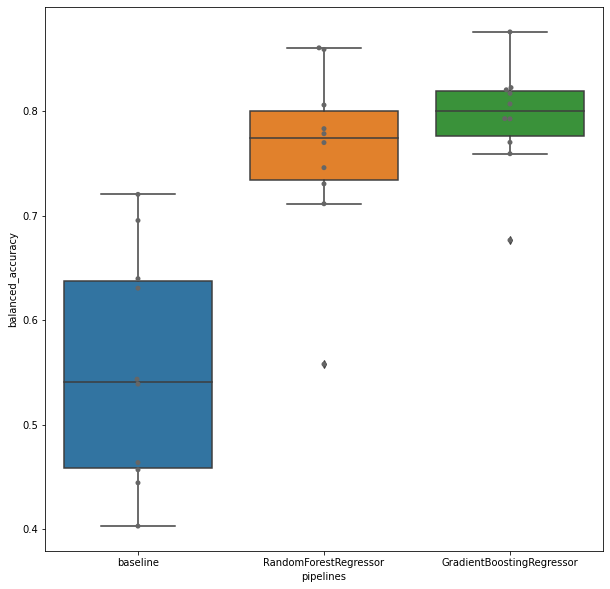

In [ ]:
plt.figure(figsize=(10,10))

ax = sns.boxplot(x="pipelines", y="balanced_accuracy", data=df_res)
ax = sns.swarmplot(x="pipelines", y="balanced_accuracy", data=df_res, color=".40")

### Final pipeline

In [ ]:
# retreinar o pipeline selecionado com todos os dados de treinamento
from sklearn.metrics import r2_score

pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test)
bac = r2_score(y_test, y_pred) 

print("R2: ", round(bac, 4))


R2:  0.8158


### Visualização do Erro

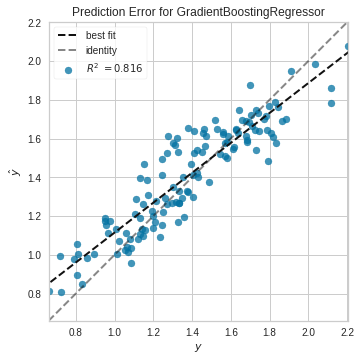

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(pipe2, X_train, y_train, X_test, y_test)

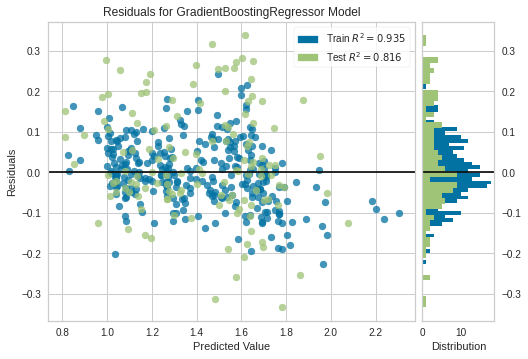

In [ ]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(pipe2, X_train, y_train, X_test, y_test)

## Referências & Links



1. [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)

2. [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

3. [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

4. [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)


<font size="1"> © <a href="https://github.com/ealcobaca">ealcobaca</a> *(2022)* </font>